In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [3]:
url = 'C:\\Anaconda\\aaa\\echocardiogram.data'
data = pd.read_csv(url, sep = ',', na_values = '?', engine = 'python')

In [4]:
data = data.fillna(data.median(axis = 0), axis = 0)
data.columns = ['C' + str(i) for i in range(1, 14)]

In [5]:
data.keys()

Index(['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11',
       'C12', 'C13'],
      dtype='object')

In [6]:
X = data.drop(('C13'), axis = 1) 
X = data.drop(('C11'), axis = 1)
y = data['C13']
print(X.shape)
print(y.shape)

(131, 12)
(131,)


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 7)
N_test, _ = X_test.shape

Random Forest

In [8]:
from sklearn.ensemble import RandomForestClassifier

Массив с деревьями

In [35]:
c_arr = np.arange(1,100,1)

In [36]:
test_err_RF = []
train_err_RF = []
oob_err_RF = []

In [37]:
import warnings
warnings.filterwarnings('ignore')

for c in c_arr:
    RandomForest = RandomForestClassifier(n_estimators=c, warm_start = True, oob_score = True)
    RandomForest.fit(X_train, y_train)
    
    y_train_pred = RandomForest.predict(X_train)
    y_test_pred = RandomForest.predict(X_test)
    
    train_err_RF.append(np.mean(y_train != y_train_pred))
    test_err_RF.append(np.mean(y_test != y_test_pred))
    
    oob_err_RF.append(1 - RandomForest.oob_score_)

In [38]:
print(np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred))

0.0 0.0151515151515


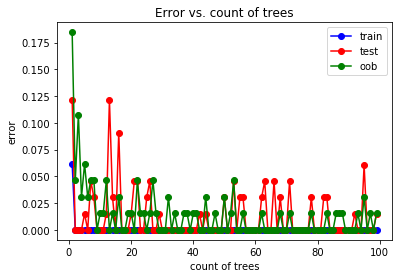

In [39]:
plt.plot(c_arr, train_err_RF, 'b-o', label = 'train')
plt.plot(c_arr, test_err_RF, 'r-o', label = 'test')
plt.plot(c_arr, oob_err_RF, 'g-o', label = 'oob')
plt.title('Error vs. count of trees')
plt.xlabel('count of trees')
plt.ylabel('error')
plt.legend()
pass

Минимальные значения ошибок на обучающей и тестовой выборке

In [40]:
min_train_err = np.min(train_err_RF)
min_test_err_RF = np.min(test_err_RF)
print(min_train_err, min_test_err_RF)

0.0 0.0


Не наблюдается ни переобучения, ни недообучения. Ошибка на обучающей и тестовой выборке 0%.

Extremely Random Trees

In [41]:
from sklearn.ensemble import ExtraTreesClassifier

Массивы ошибок

In [42]:
test_err_ERF = []
train_err_ERF = []
oob_err_ERF = []

In [43]:
import warnings
warnings.filterwarnings('ignore')

for c in c_arr:
    ExtrRandomForest = ExtraTreesClassifier(n_estimators=c, bootstrap=True, oob_score = True)
    ExtrRandomForest.fit(X_train, y_train)
    
    y_train_pred = ExtrRandomForest.predict(X_train)
    y_test_pred = ExtrRandomForest.predict(X_test)
    
    train_err_ERF.append(np.mean(y_train != y_train_pred))
    test_err_ERF.append(np.mean(y_test != y_test_pred))
    
    oob_err_ERF.append(1 - ExtrRandomForest.oob_score_)

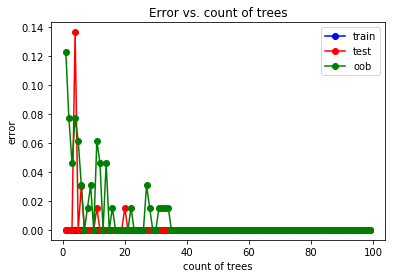

In [44]:
plt.plot(c_arr, train_err_ERF, 'b-o', label = 'train')
plt.plot(c_arr, test_err_ERF, 'r-o', label = 'test')
plt.plot(c_arr, oob_err_ERF, 'g-o', label = 'oob')
plt.title('Error vs. count of trees')
plt.xlabel('count of trees')
plt.ylabel('error')
plt.legend()
pass

Минимальные значения ошибок на обучающей и тестовой выборке

In [45]:
min_train_err = np.min(train_err_ERF)
min_test_err_ERF = np.min(test_err_ERF)
print(min_train_err, min_test_err_ERF)

0.0 0.0


Не наблюдается ни переобучения, ни недообучения. Ошибка на обучающей и тестовой выборке 0%.

AdaBoost

In [46]:
from sklearn.ensemble import AdaBoostClassifier

In [47]:
test_err_AB = []
train_err_AB = []
oob_err_AB = []

In [48]:
import warnings
warnings.filterwarnings('ignore')

for c in c_arr:
    AB = AdaBoostClassifier(n_estimators = c)
    AB.fit(X_train, y_train)
    
    y_train_pred = AB.predict(X_train)
    y_test_pred = AB.predict(X_test)
    
    train_err_AB.append(np.mean(y_train != y_train_pred))
    test_err_AB.append(np.mean(y_test != y_test_pred))

In [49]:
print(np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred))

0.0 0.0


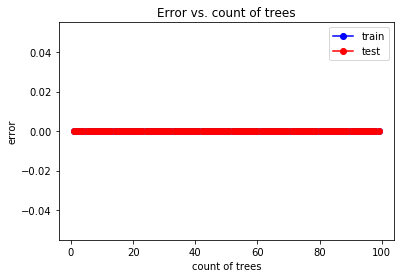

In [50]:
plt.plot(c_arr, train_err_AB, 'b-o', label = 'train')
plt.plot(c_arr, test_err_AB, 'r-o', label = 'test')
#plt.plot(c_arr, oob_err_AB, 'g-o', label = 'oob')
plt.title('Error vs. count of trees')
plt.xlabel('count of trees')
plt.ylabel('error')
plt.legend()
pass

In [51]:
min_train_err = np.min(train_err_AB)
min_test_err_AB = np.min(test_err_AB)
print(min_train_err, min_test_err_AB)

0.0 0.0


Не наблюдается ни переобучения, ни недообучения. Ошибка на обучающей и тестовой выборке 0%.

Gradient Boosted Trees

In [52]:
from sklearn.ensemble import GradientBoostingClassifier

In [53]:
test_err_GBT = []
train_err_GBT = []
oob_err_GBT = []

In [54]:
import warnings
warnings.filterwarnings('ignore')

for c in c_arr:
    GBT = GradientBoostingClassifier(n_estimators=c)
    GBT.fit(X_train, y_train)
    
    y_train_pred = GBT.predict(X_train)
    y_test_pred = GBT.predict(X_test)
    
    train_err_GBT.append(np.mean(y_train != y_train_pred))
    test_err_GBT.append(np.mean(y_test != y_test_pred))

In [55]:
print(np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred))

0.0 0.0


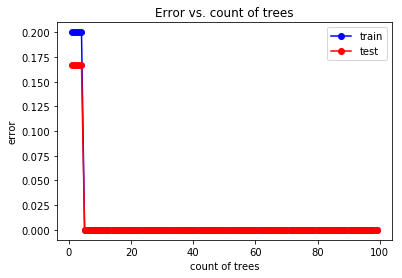

In [56]:
plt.plot(c_arr, train_err_GBT, 'b-o', label = 'train')
plt.plot(c_arr, test_err_GBT, 'r-o', label = 'test')
#plt.plot(c_arr, oob_err_GBT, 'g-o', label = 'oob')
plt.title('Error vs. count of trees')
plt.xlabel('count of trees')
plt.ylabel('error')
plt.legend()
pass

In [57]:
min_train_err = np.min(train_err_GBT)
min_test_err_GBT = np.min(test_err_GBT)
print(min_train_err, min_test_err_GBT)

0.0 0.0


Не наблюдается ни переобучения, ни недообучения. Ошибка на обучающей и тестовой выборке 0%.

Посмотрим на матрицу рассогласования

In [58]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test_pred, y_test))

[[55  0]
 [ 0 11]]


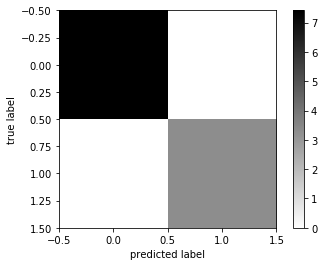

In [59]:
M = confusion_matrix(y_test_pred, y_test)
M = np.sqrt(M)
plt.imshow(M, interpolation = 'nearest')
plt.set_cmap('binary')
plt.xlabel("predicted label")
plt.ylabel("true label")
plt.colorbar()
pass

Еще одна метрика качества:

In [60]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00        55
        1.0       1.00      1.00      1.00        11

avg / total       1.00      1.00      1.00        66



Сравним графики ошибки на тестовой выборке

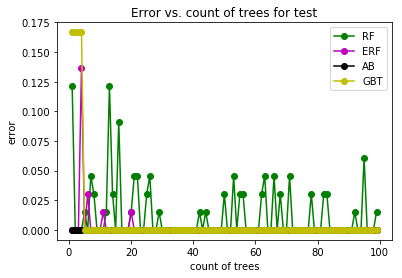

In [61]:
plt.plot(c_arr, test_err_RF, 'g-o', label = 'RF')
plt.plot(c_arr, test_err_ERF, 'm-o', label = 'ERF')
plt.plot(c_arr, test_err_AB, 'k-o', label = 'AB')
plt.plot(c_arr, test_err_GBT, 'y-o', label = 'GBT')

plt.title('Error vs. count of trees for test')
plt.xlabel('count of trees')
plt.ylabel('error')
plt.legend()
pass

In [62]:
print(min_test_err_RF, min_test_err_ERF, min_test_err_AB, min_test_err_GBT)

0.0 0.0 0.0 0.0


На всех алгоритмах достигается ошибка в 0% на обучающей и тестовой выборках, но самый худший Random Forest. Так как в зависимости от деревьев ошибка "прыгает".